# Plotting Categorical Data

## Plotting Distributions Across Categories


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
market_df = pd.read_csv("./global_sales_data/market_fact.csv")
customer_df = pd.read_csv("./global_sales_data/cust_dimen.csv")
product_df = pd.read_csv("./global_sales_data/prod_dimen.csv")
shipping_df = pd.read_csv("./global_sales_data/shipping_dimen.csv")
orders_df = pd.read_csv("./global_sales_data/orders_dimen.csv")

### Boxplots 

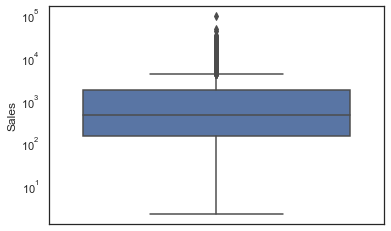

In [2]:
sns.boxplot(y=market_df['Sales'])
plt.yscale('log')
plt.show()

In [3]:
df = pd.merge(market_df, product_df, how='inner', on='Prod_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


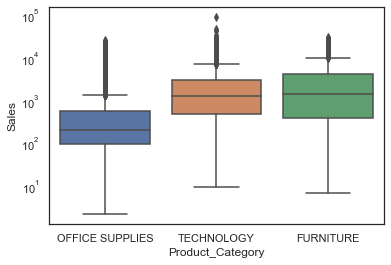

In [4]:
sns.boxplot(x='Product_Category', y='Sales', data=df)
plt.yscale('log')
plt.show()

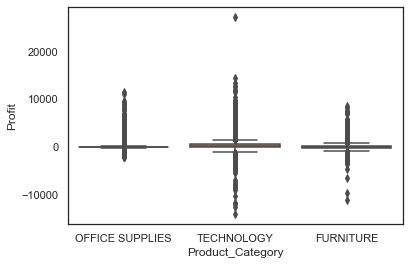

In [5]:
sns.boxplot(x='Product_Category', y='Profit', data=df)
plt.show()

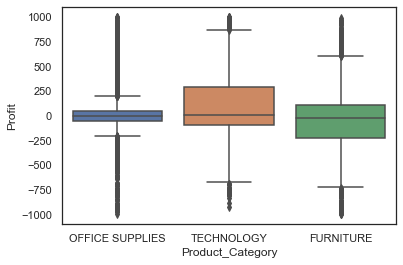

In [6]:
df = df[(df.Profit<1000) & (df.Profit>-1000)]
sns.boxplot(x='Product_Category', y='Profit', data=df)
plt.show()

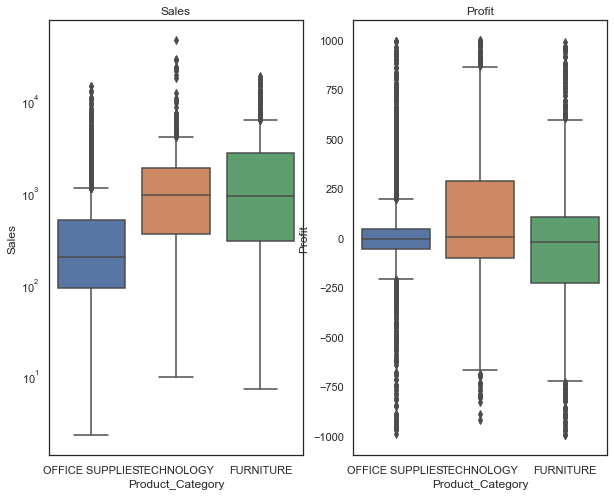

In [7]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='Product_Category', y='Sales', data=df)
plt.title("Sales")
plt.yscale('log')
plt.subplot(1, 2, 2)
sns.boxplot(x='Product_Category', y='Profit', data=df)
plt.title("Profit")
plt.show()

In [8]:
df = pd.merge(df, customer_df, how='inner', on='Cust_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE


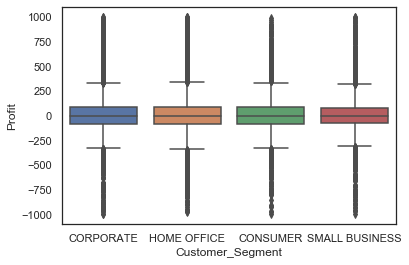

In [9]:
sns.boxplot(x='Customer_Segment', y='Profit', data=df)
plt.show()

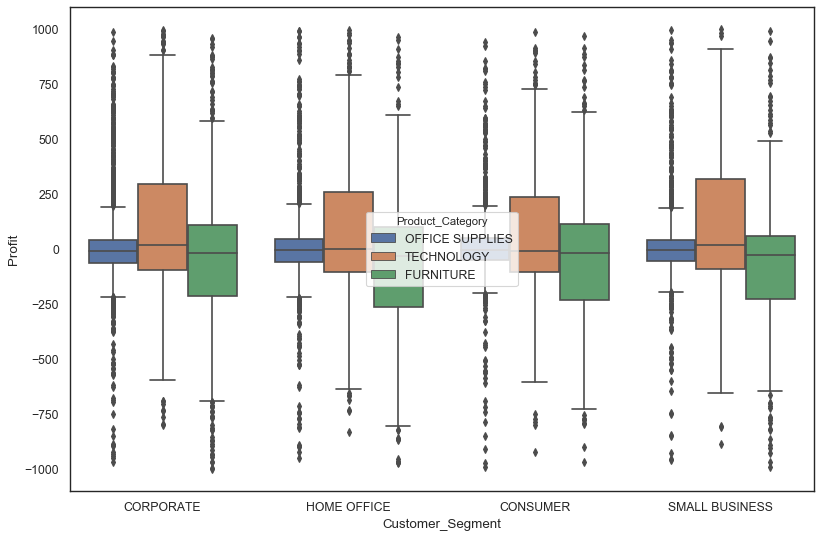

In [10]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='Customer_Segment', y='Profit', hue="Product_Category", data=df)
plt.show()

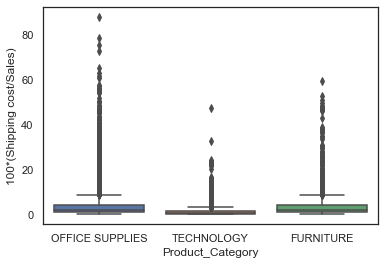

In [11]:
sns.boxplot(x=df['Product_Category'], y=100*df['Shipping_Cost']/df['Sales'])
plt.ylabel("100*(Shipping cost/Sales)")
plt.show()

## Plotting Aggregated Values across Categories


### Bar Plots - Mean, Median and Count Plots




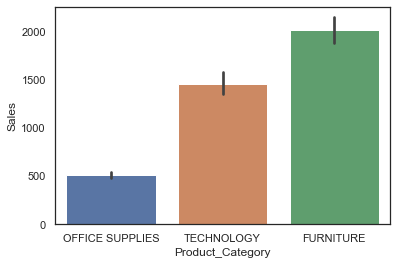

In [13]:
sns.barplot(x='Product_Category', y='Sales', data=df)
plt.show()

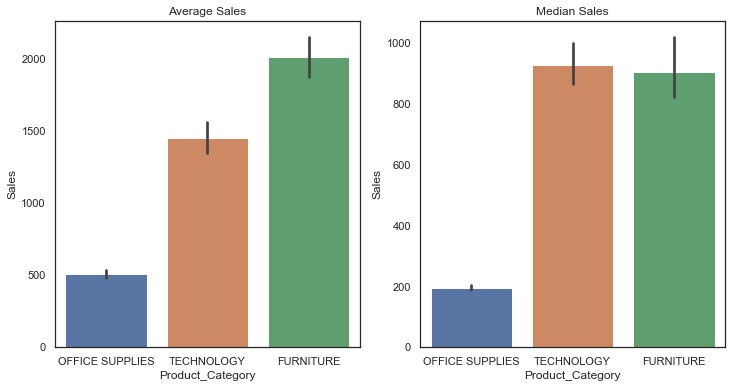

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Product_Category', y='Sales', data=df)
plt.title("Average Sales")
plt.subplot(1, 2, 2)
sns.barplot(x='Product_Category', y='Sales', data=df, estimator=np.median)
plt.title("Median Sales")
plt.show()

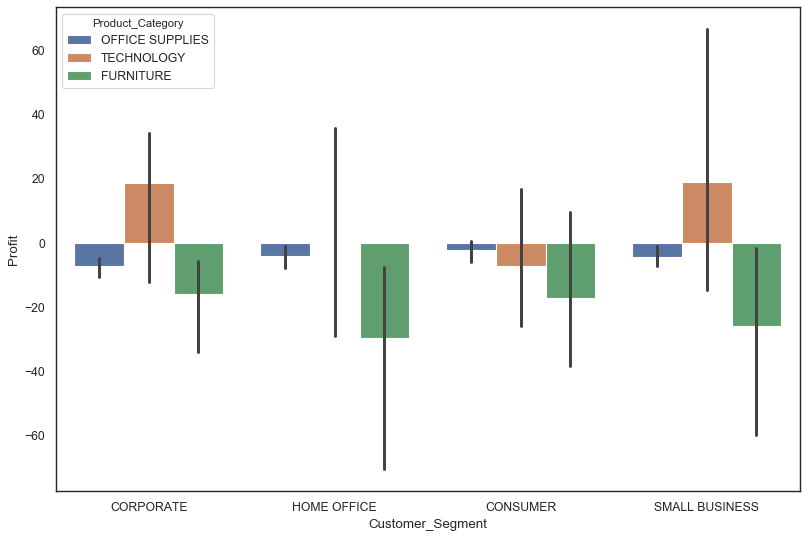

In [15]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='Customer_Segment', y='Profit', hue="Product_Category", data=df, estimator=np.median)
plt.show()

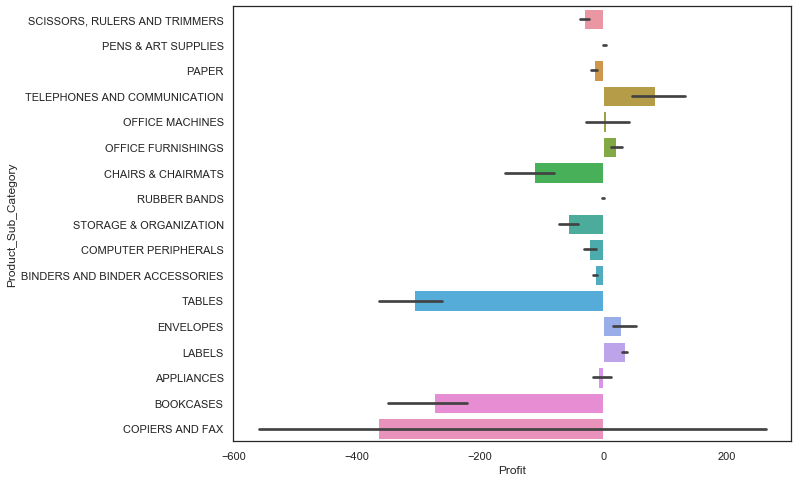

In [16]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Profit', y="Product_Sub_Category", data=df, estimator=np.median)
plt.show()

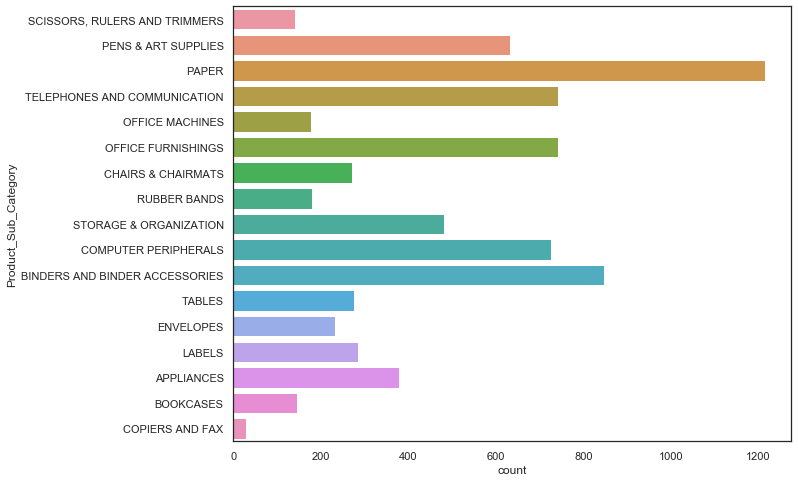

In [18]:
plt.figure(figsize=(10, 8))
sns.countplot(y="Product_Sub_Category", data=df)
plt.show()

##  Resource
<a href="https://seaborn.pydata.org/tutorial/categorical.html">Seaborn official tutorial on categorical variables</a>